   n_ev  n_ms  lat_mean  success_rate
0     1     1     87.30         98.69
1     1     2    123.11        100.00
2     1     3    157.12         99.95
3     1     4    193.77         99.98
4     1     5    226.11        100.00
Lowest mean latency:
     n_ev  n_ms  lat_mean  success_rate
0      1     1     87.30         98.69
1      1     2    123.11        100.00
10     2     1    123.44         99.12
2      1     3    157.12         99.95
11     2     2    157.91         99.81
Highest success rate:
     n_ev  n_ms  lat_mean  success_rate
4      1     5    226.11         100.0
39     4    10    511.27         100.0
7      1     8    332.00         100.0
8      1     9    366.10         100.0
9      1    10    402.27         100.0


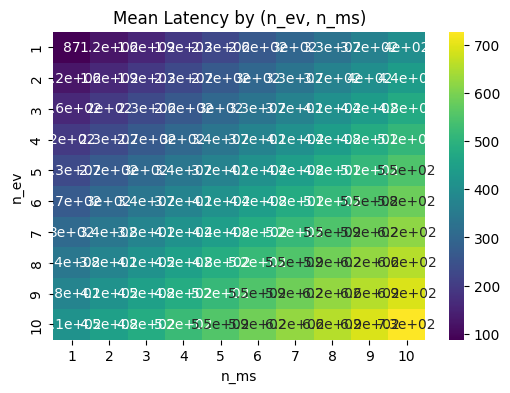

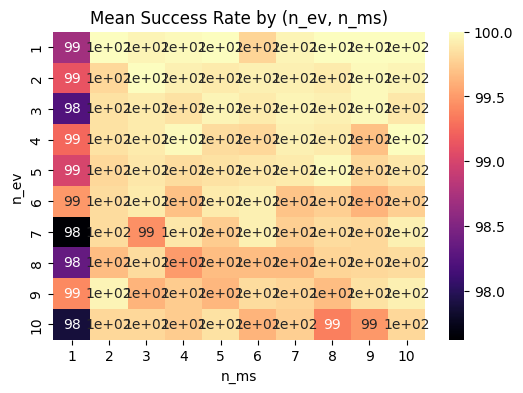

In [5]:
# experiment_analysis.ipynb

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('../experiment-1.csv')

# Strip leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Group by n_ev and n_ms, computing mean of lat_mean and success_rate
grouped = df.groupby(['n_ev', 'n_ms']).agg({
    'lat_mean': 'mean',
    'success_rate': 'mean'
}).reset_index()

print(grouped.head())

# Quick look at best/worst
best_latency = grouped.sort_values('lat_mean').head(5)
best_success = grouped.sort_values('success_rate', ascending=False).head(5)
print("Lowest mean latency:\n", best_latency)
print("Highest success rate:\n", best_success)

# Pivot using keyword arguments
latency_pivot = grouped.pivot(index='n_ev', columns='n_ms', values='lat_mean')
success_pivot = grouped.pivot(index='n_ev', columns='n_ms', values='success_rate')

# Plot mean latency heatmap
plt.figure(figsize=(6,4))
sns.heatmap(latency_pivot, annot=True, cmap='viridis')
plt.title('Mean Latency by (n_ev, n_ms)')
# plt.savefig('latency_heatmap.pdf', bbox_inches='tight')
plt.show()

# Plot success rate heatmap
plt.figure(figsize=(6,4))
sns.heatmap(success_pivot, annot=True, cmap='magma')
plt.title('Mean Success Rate by (n_ev, n_ms)')
# plt.savefig('success_rate_heatmap.pdf', bbox_inches='tight')
plt.show()
